In [1]:
import pandas as pd
import numpy as np
import requests
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By 
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support.ui import Select
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium.common.exceptions import ElementNotInteractableException
import time
import matplotlib as mpl
import matplotlib.pyplot as plt      
import math
import seaborn as sns
from sklearn.decomposition import PCA
%matplotlib inline

# Visualization

In [2]:
df =pd.read_csv("C:\\Users\\amitx\Desktop\\עמית קבצים\\לימודים\\שנה ב\\מדעי הנתנוים\\פרויקט\\פרויקט מתוקן\\Data clean.csv")
df = df.drop("Unnamed: 0",axis=1)
df = df.drop("index",axis=1)
df

,price,color,likes,brand,Percentage discount,Rate,Fit,in sale,category,sex,color_encoded,brand_encoded,fabric types,Fit_encoded,category_encoded,sex_encoded,fabric types_encoded
0,158.60,brown,910.0,nike,45,0.0,oversized fit,1,hoodies & sweatshirts,women,3,16,fleece,12,1,1,4
1,196.80,black,216.0,under armour,29,0.0,regular fit,1,hoodies & sweatshirts,women,1,25,fabric,14,1,1,13
2,238.79,white,669.0,nike,29,0.0,relaxed fit,1,hoodies & sweatshirts,women,17,16,fabric,17,1,1,13
3,272.90,stone,887.0,nike,19,0.0,relaxed fit,1,hoodies & sweatshirts,women,16,16,fabric,17,1,1,13
4,314.89,black,640.0,nike,24,0.0,regular fit,1,hoodies & sweatshirts,women,1,16,fabric,14,1,1,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,225.00,black,118.0,napapijri,0,0.0,regular fit,0,t-shirts & vests,men,1,14,fabric,14,4,0,13
3507,140.00,black,181.0,asos design,0,0.0,oversized fit,0,t-shirts & vests,men,1,5,fabric,12,4,0,13
3508,225.00,black,125.0,napapijri,0,0.0,regular fit,0,t-shirts & vests,men,1,14,fabric,14,4,0,13
3509,145.00,white,216.0,topman,0,0.0,oversized fit,0,t-shirts & vests,men,17,23,fabric,12,4,0,13


This graph describes the connection between every two colomns. We can see that there isn't much connection between the columns. 

<Axes: >

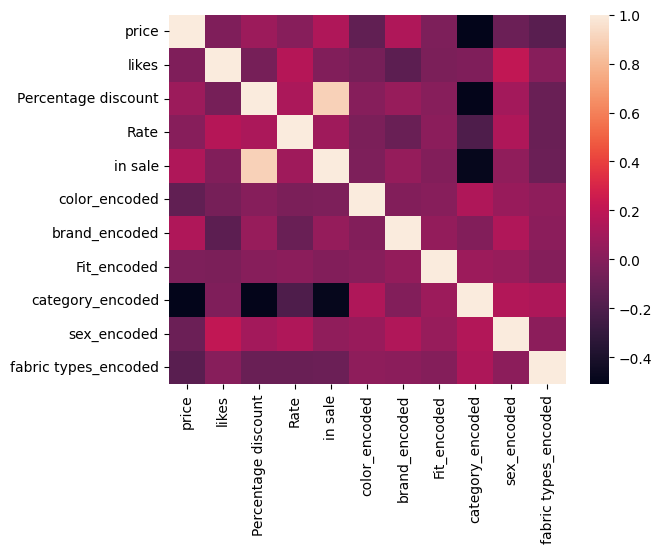

In [3]:
sns.heatmap(df.corr(), annot=False)

By the clustering of the dots on the lefct side of the graph we can see that once the item is cheaper it has more likes. In the range of 10 to 200 there are more items that recieved likes. 

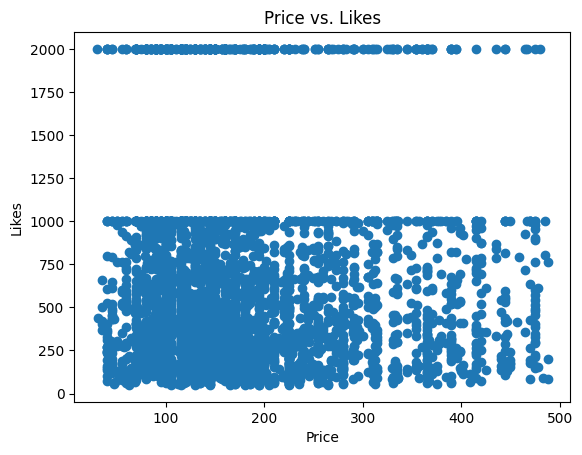

In [4]:
plt.scatter(df['price'], df['likes'])
plt.xlabel('Price')
plt.ylabel('Likes')
plt.title('Price vs. Likes')
plt.show()

In this graph, we can see that the number of cloths of type "top" which characterizes female clothing, has more items by far than the rest of the types. ש כמות גדולה משמעותית משאר המוצרים

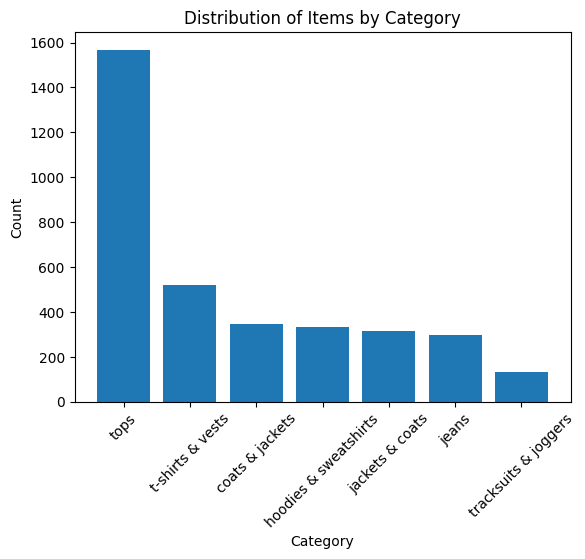

In [5]:
counts = df['category'].value_counts()
plt.bar(counts.index, counts.values)
plt.xticks(rotation=45)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Items by Category')
plt.show()

The following graph you can see that as the number of likes go up then the number of items goes down untill 1000 likes is reached. At this point there are many items. 

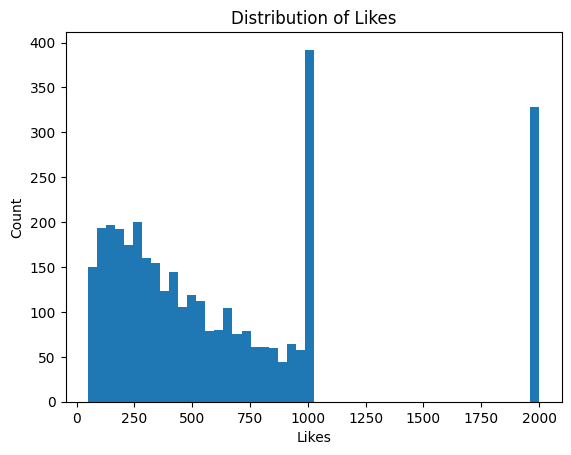

In [6]:
plt.hist(df['likes'], bins=50)
plt.xlabel('Likes')
plt.ylabel('Count')
plt.title('Distribution of Likes')
plt.show()

In the following graph we can see by color the cluster of likes that each brand has

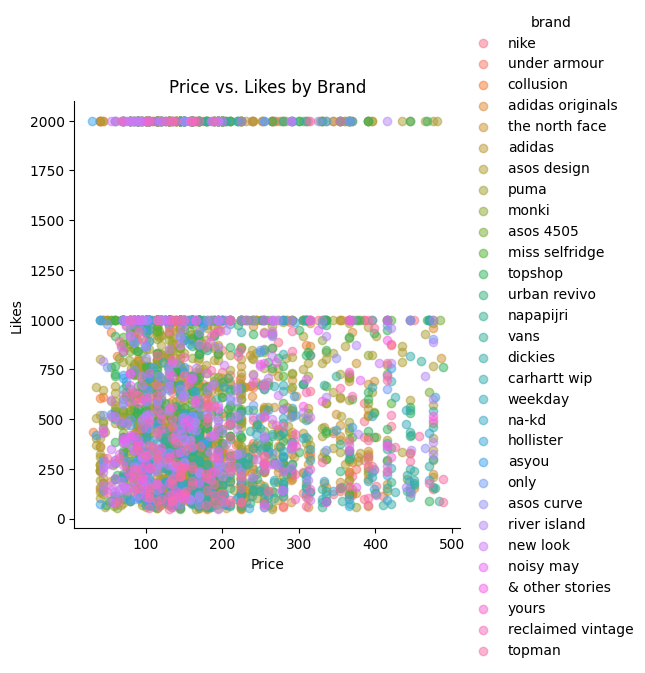

In [7]:
sns.lmplot(x='price', y='likes', data=df, hue='brand', fit_reg=False, scatter_kws={'alpha':0.5})
plt.xlabel('Price')
plt.ylabel('Likes')
plt.title('Price vs. Likes by Brand')
plt.show()

The strongest connection is between the sale and the price colomn can be seen in the following diagram. 

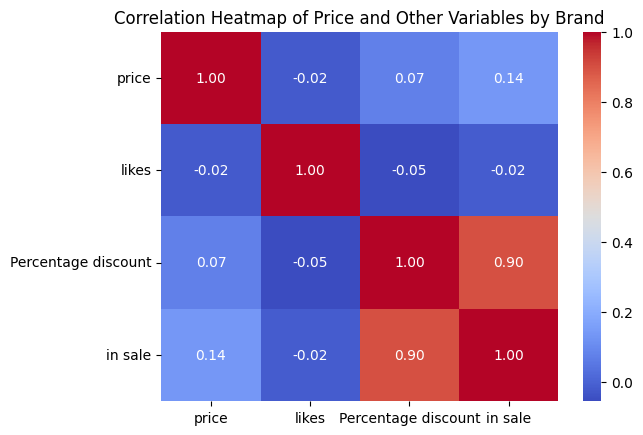

In [8]:
sns.heatmap(df[['price', 'likes', 'Percentage discount', 'in sale']].corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap of Price and Other Variables by Brand')
plt.show()

In the following graph we can see that females have more ikes for items that price range between 100 and 200. There are many items that receied likes from the male gender. 

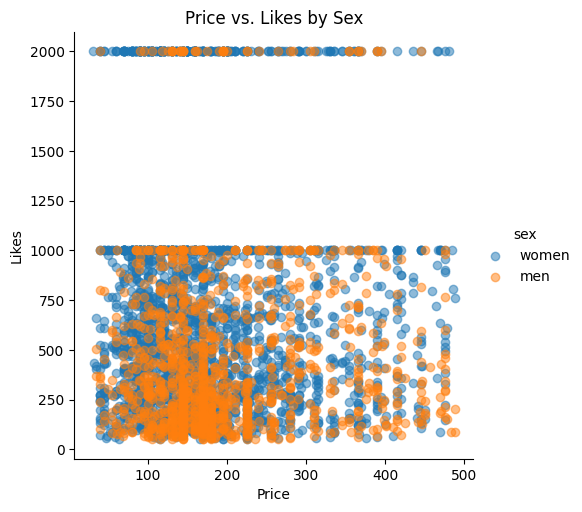

In [9]:
sns.lmplot(x='price', y='likes', data=df, hue='sex', fit_reg=False, scatter_kws={'alpha':0.5})
plt.xlabel('Price')
plt.ylabel('Likes')
plt.title('Price vs. Likes by Sex')
plt.show()

The following graph demonstrates the average price of items on sale and items that aren't on sale. We can see that surprisingly, the average prices on sale is higher. 

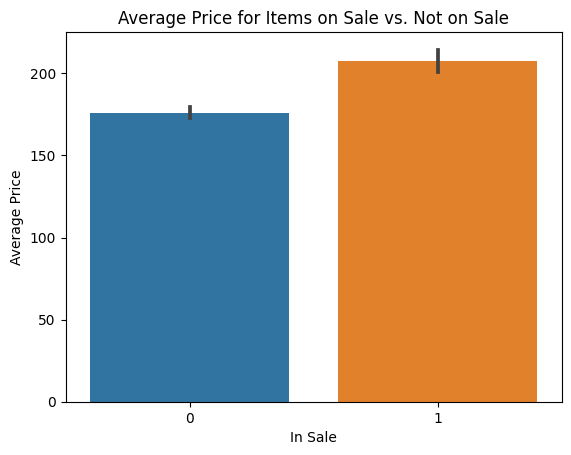

In [10]:
sns.barplot(x='in sale', y='price', data=df)
plt.xlabel('In Sale')
plt.ylabel('Average Price')
plt.title('Average Price for Items on Sale vs. Not on Sale')
plt.show()

The following graph shows the price average in relation to the brand. It can be seen for example, that the average prices of "Carhartt wip" are the highest. 

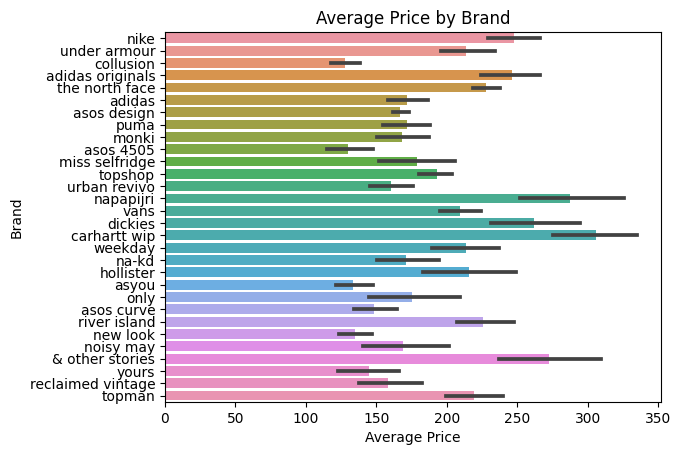

In [11]:
sns.barplot(x='price', y='brand', data=df)
plt.xlabel('Average Price')
plt.ylabel('Brand')
plt.title('Average Price by Brand')
plt.show()

In the following graph we see the frequency of a brand in relation to its price. It can be seen clearly that Asos supervise items with the price range of 100 to 200. 

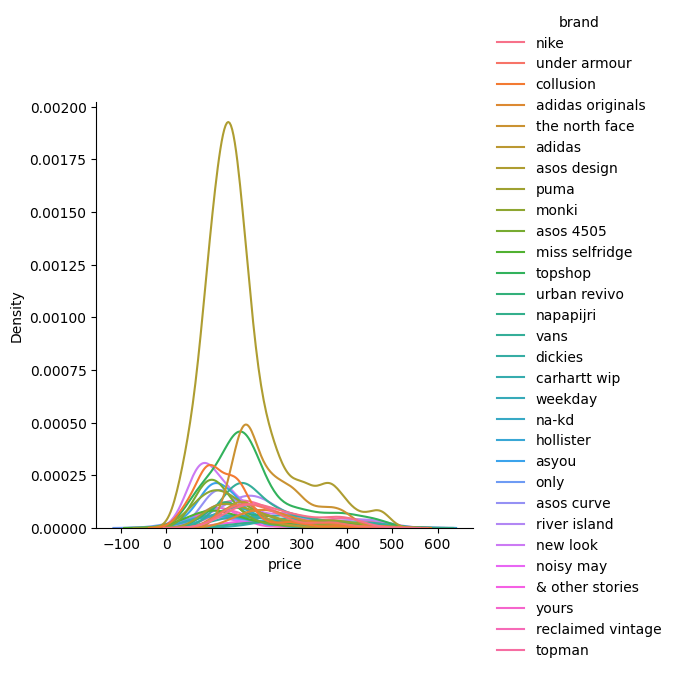

In [12]:
sns.displot(df, x="price", hue="brand", kind="kde" , warn_singular=False)

The following graph shows the connection between type of fabric and brand. 

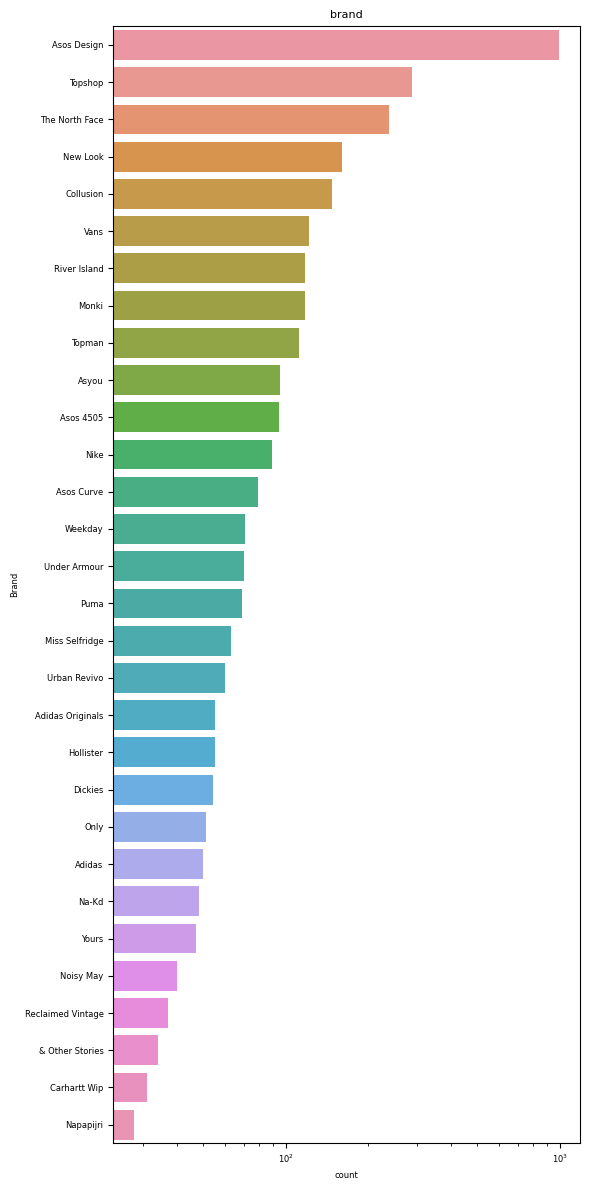

In [13]:
plt.figure(figsize = (6, 12))
Brands = list( map(lambda x: x.title(), df["brand"].value_counts().keys().tolist()))
ax = sns.countplot(y = "brand", data = df,  order = df["brand"].value_counts().index)

ax.set_xscale("log")
ax.axes.set_title("brand", fontsize = 8)
ax.set_xlabel("count", fontsize = 6)
ax.set_ylabel("Brand", fontsize = 6)
ax.tick_params(labelsize = 6)

ax.set_yticklabels(Brands, rotation = 0, fontsize = 6)
plt.tight_layout()
plt.show()